Load the dataset and explore the variables.
We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
Extract the target variable.
Extract the independent variables and scale them.
Build the logistic regression model.
Evaluate the model.
Even a simple model will give us more than 70% accuracy. Why?
Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import imblearn 
import pandas as pd
import numpy as np

# This is just so that we don't get annoying warnings
import warnings
warnings.filterwarnings('ignore')

# This is the most common viz library in python
import matplotlib.pyplot as plt
%matplotlib inline

# This one is the above on steroids
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# These Libs are for stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r"C:\Users\pedro\Desktop\ironhack\lab_10\lab-imbalanced-data\files_for_lab\customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#standartize the columns to be easier to handle it
cols = []
for i in range(len(df.columns)): 
    cols.append(df.columns[i].lower().replace(' ', '_')) # I always do this replace to get rid of spaces
df.columns = cols
df


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#looking for null values: there are no null values 
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [6]:
#check which categrorical and numerical data we have, al the columns we need for this lab are in numerical excepto the target variable. 
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [28]:
#chek for the unique values oh the target variable 

df['churn'].unique()

# get the target variable into integer 

df['churn']=df['churn'].replace({'Yes': 1, 'No': 0})
df

#check if the unique values are correct 
df['churn'].unique()

array([0, 1], dtype=int64)

In [10]:
#since we wont be needing all the categorical data for this lab lets splitt the df in numerical and categorical
numerical_df = df.select_dtypes(include=np.number)
numerical_df.dtypes
categorical_df=df.select_dtypes(include=object)
categorical_df

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6


In [11]:
#Lets scalle the varibles to see if they fit a normal distribution 
from sklearn.preprocessing import MinMaxScaler

num_data = numerical_df.drop(['churn'], axis=1)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_data)
normalized_data = pd.DataFrame(normalized_data, columns=num_data.columns)
normalized_data

,seniorcitizen,tenure,monthlycharges
0,0.0,0.013889,0.115423
1,0.0,0.472222,0.385075
2,0.0,0.027778,0.354229
3,0.0,0.625000,0.239303
4,0.0,0.027778,0.521891
...,...,...,...
7038,0.0,0.333333,0.662189
7039,0.0,1.000000,0.845274
7040,0.0,0.152778,0.112935
7041,1.0,0.055556,0.558706


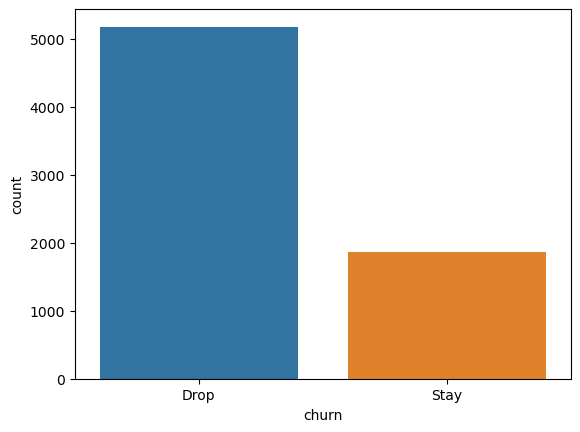

In [12]:
#Lets do a plot to vizualize if the data is imbalanced and whic is the minority variable 
sns.countplot(x="churn", data=numerical_df)

plt.title('')
plt.xticks([0,1],['Drop',"Stay"])
plt.show()


In [13]:
# I'm doing an oversampling, because adding data that is not in the set will probably change the predictive values, 
#for this we first have to seprate the data into train and test, so we have the test data to test our model and make predictions

#first do a x, y split 
X = numerical_df.drop(['churn'], axis=1)
y = numerical_df['churn']

#Then a train and test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

# This result gives us the 80% accuraçy, which is good but it doenst tell us much about how good is our model, because this just means the total of corretc values we found given the total. and we dont know the ones we didnt catch 
#and we want to know wich ones we got wrong. 
#getting a good accuracy doenst mean our predictions are going to be good, because if we cant predict the ones that dont fit or follow the parameters the model isnt wotking as it should. 

0.8055358410220014

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

In [15]:
#chack ht recall and precision for the data as it is, imbalanced, so we can compare it with the undersampling and the SMOTE. 
pred = LR.predict(X_test)
pred
print('Precision is:', precision_score(y_test, pred))
print('Recall is:' , recall_score(y_test, pred))
print('F1 is:' , f1_score(y_test, pred))

print(classification_report(y_test, pred))


#and has we can see the recall value for the people who stayed in the company is 50%, wich doens really help us predict because we always have 50% chance of one or the other. 

Precision is: 0.6911196911196911
Recall is: 0.47989276139410186
F1 is: 0.5664556962025317
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



In [16]:
#did this confusion matriz so we can compare it later with the confusion matrix of the undersample data and smore data 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[956,  80],
       [194, 179]], dtype=int64)

In [17]:
#Starting the undersampling we have to x,y split and train and test split 

from sklearn.utils import resample

X = numerical_df.drop(['churn'], axis=1)
y = numerical_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [22]:
#but since we want to use only the train data we had to create a new data frame with the target variable and th other variables 
train=pd.concat([X_train, y_train], axis=1)
train

,seniorcitizen,tenure,monthlycharges,churn
2142,0,21,64.85,0
1623,0,54,97.20,0
6074,0,1,23.45,1
1362,0,4,70.20,1
6754,0,0,61.90,0
...,...,...,...,...
3772,0,1,95.00,1
5191,0,23,91.10,0
5226,0,12,21.15,0
5390,1,12,99.45,1


In [30]:
#First we are going to sperate the data by minority and by majority
drop = train[train['churn']==0] 
stay = train[train['churn']==1]

display(drop.shape)
display(stay.shape)

(4138, 4)

(1496, 4)

In [31]:
#Then we undersample the majority data 
drop_undersample = resample(drop, replace=False, n_samples=len(stay), random_state=0)

display(drop_undersample.shape)
display(stay.shape)

#we can see that they have the same amount now 

(1496, 4)

(1496, 4)

In [32]:
#Now we concat the 2 df the data frame fot he majority that now has the same shape of the majority 
train_undersample = pd.concat([drop_undersample, stay], axis=0)
train_undersample

In [33]:
#Now we have to do a x, y splot again so we can aplly it to our model along with the data test defined in the begining 
X_train_under = train_undersample.drop(['churn'], axis=1)
y_train_under = train_undersample['churn']

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)

#predictions
pred = LR.predict(X_test) 
pred
print('Precision is:', precision_score(y_test, pred))
print('Recall is:' , recall_score(y_test, pred))
print('F1 is:' , f1_score(y_test, pred))

print(classification_report(y_test, pred))
                                   

Precision is: 0.5124555160142349
Recall is: 0.7721179624664879
F1 is: 0.616042780748663
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1036
           1       0.51      0.77      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



In [29]:
#after doing this confusion matrix we can see that we substnatially decrease the amount of false negatives by 85, 
#which means our recall amount incresed and we catched 109 more people that were suposed to have droped the company but didnt  
confusion_matrix(y_test,pred) 

array([[762, 274],
       [ 85, 288]], dtype=int64)

In [34]:
#Do a SMOTE

from imblearn.over_sampling import SMOTE

#Do a X_train and y train split 
X = numerical_df.drop(['churn'], axis=1)
y = numerical_df['churn']

sm = SMOTE(random_state =0,sampling_strategy=1)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)


#concat the data so we can treat them as one 
train_smote = pd.concat([X_train_SMOTE,y_train_SMOTE], axis = 1)
train_smote
train_smote.sum()


#check the logistic regression for SMOTE sampling 
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

print(classification_report(y_test, pred))


precision:  0.5126811594202898
recall:  0.7587131367292225
f1:  0.6118918918918917
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1036
           1       0.51      0.76      0.61       373

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



In [35]:
confusion_matrix(y_test,pred)

array([[767, 269],
       [ 90, 283]], dtype=int64)

In [ ]:
#REsult comparing the SMOTE which in the end is adding data to the data set, the recal pewrcentage decrease and the amlount of false negatives incrreased, wich means we catch less people who stayed in the company
# but comparing to the first simple model ity impro